In [6]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Sección 1: Cargar Librerías y Dataset
En esta sección se importan las librerías necesarias y se carga el dataset para su análisis.


In [7]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (asegúrate de que el archivo está en el directorio correcto)
data = pd.read_csv('breast-cancer-wisconsin.csv')

# Exploración inicial del dataset
print("\nInformación del dataset antes de la transformación:")
data.info()
print("\nResumen estadístico inicial:")
print(data.describe())



Información del dataset antes de la transformación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   clump_thickness              683 non-null    int64
 2   uniformity_of_cell_size      683 non-null    int64
 3   uniformity_of_cell_shape     683 non-null    int64
 4   marginal_adhesion            683 non-null    int64
 5   single_epithelial_cell_size  683 non-null    int64
 6   bare_nuclei                  683 non-null    int64
 7   bland_chromatin              683 non-null    int64
 8   normal_nucleoli              683 non-null    int64
 9   mitoses                      683 non-null    int64
 10  class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB

Resumen estadístico inicial:
               code  clump_thickness  unifor

# Sección 2: Análisis de Valores Faltantes
Identificamos y tratamos los valores faltantes en el dataset utilizando imputación.


In [8]:
# Identificar valores faltantes
missing_values = data.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
print("\nValores faltantes después de la imputación:")
print(data_imputed.isnull().sum())



Valores faltantes por columna:
code                           0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

Valores faltantes después de la imputación:
code                           0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64


# Sección 3: Análisis de Clases
Se analiza la distribución de las clases antes del balanceo.



Distribución de clases antes del balanceo:
class
2.0    444
4.0    239
Name: count, dtype: int64


C:\Users\vicda\AppData\Local\Temp\ipykernel_2960\468185436.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index, y=distribution.values, palette='viridis')


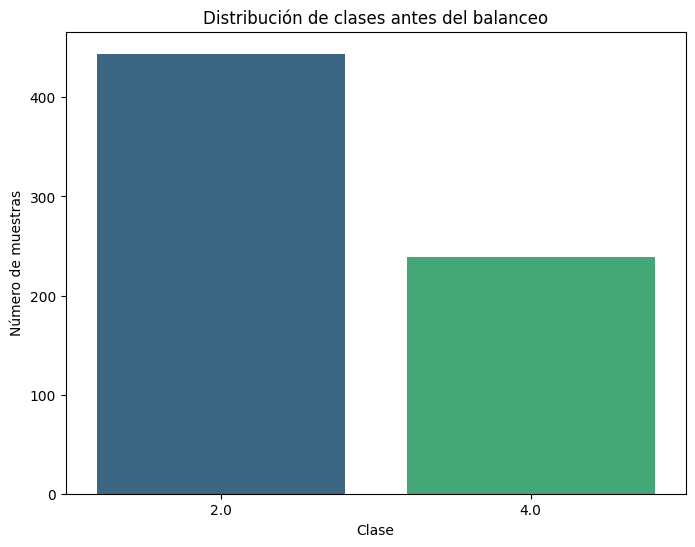

In [9]:
# Analizar la distribución de clases antes del balanceo
class_column = 'class'  # Cambiado a 'class' para este dataset
distribution = data_imputed[class_column].value_counts()
print("\nDistribución de clases antes del balanceo:")
print(distribution)

# Visualizar la distribución de clases
plt.figure(figsize=(8, 6))
sns.barplot(x=distribution.index, y=distribution.values, palette='viridis')
plt.title('Distribución de clases antes del balanceo')
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.show()


# Sección 4: Balanceo de Clases con SMOTE
Se utiliza la técnica SMOTE para balancear las clases en el dataset.


C:\Users\vicda\AppData\Local\Temp\ipykernel_2960\2716281078.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution_after.index, y=distribution_after.values, palette='viridis')



Distribución de clases después del balanceo:
class
2.0    444
4.0    444
Name: count, dtype: int64


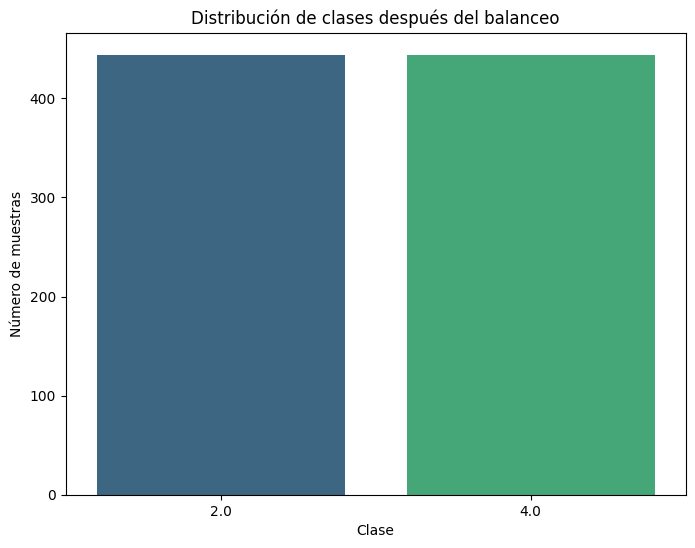

In [10]:
# Balanceo de clases con SMOTE
X = data_imputed.drop(columns=[class_column])
y = data_imputed[class_column]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
data_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[class_column])], axis=1)

# Analizar la distribución de clases después del balanceo
distribution_after = data_balanced[class_column].value_counts()
print("\nDistribución de clases después del balanceo:")
print(distribution_after)

# Visualizar la distribución de clases después del balanceo
plt.figure(figsize=(8, 6))
sns.barplot(x=distribution_after.index, y=distribution_after.values, palette='viridis')
plt.title('Distribución de clases después del balanceo')
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.show()


# Sección 5: Guardar Dataset Transformado
Guardamos el dataset transformado en un archivo CSV para uso posterior.


In [11]:
# Guardar el dataset transformado
output_path = 'breast-cancer-wisconsin-transformado.csv'
data_balanced.to_csv(output_path, index=False)
print(f"\nEl dataset transformado ha sido guardado en: {output_path}")



El dataset transformado ha sido guardado en: breast-cancer-wisconsin-transformado.csv
